In [2]:
def fold(k1,k2,n,df):
    seed(1)
    index1=cross_validation_split(df[k1],5) # Provided indices
    index1=pd.DataFrame(data=index1)
    index1=index1.T
    S=np.array([0,1,2,3,4]) # Number of folds
    #testing set
    X0_list=list()
    X1_list=list()
    Y_list=list()
    list_df0 = list(df[k1])
    list_df1 = list(df[k2])
    list_y = list(df[3])
    for i in index1[5-n]:
        X0_list.append(list_df0[i])
        X1_list.append(list_df1[i])
        Y_list.append(list_y[i])
    
    x0_test=np.array(X0_list)
    x1_test=np.array(X1_list)
    y_test=np.array(Y_list)
   
    S=np.delete(S, 5-n)
    # training set
    X0_list=list()
    X1_list=list()
    Y_list=list()
    list_df0 = list(df[k1])
    list_df1 = list(df[k2])
    list_y = list(df[3])
    for j in S:
        for i in index1[j]:
            X0_list.append(list_df0[i])
            X1_list.append(list_df1[i])
            Y_list.append(list_y[i])
    x0_train=np.array(X0_list)
    x1_train=np.array(X1_list)
    y_train=np.array(Y_list )
    
    
    y_train=y_train.reshape(388,1)
    x_train=np.vstack((x0_train,x1_train))
    x_test=np.vstack((x0_test,x1_test))   
    x_mean = x_train.T.mean(axis=0)
    x_stdev = x_train.T.std(axis=0)
    x_train_norm = (x_train.T - x_mean.T)/(x_stdev.T)
    x_train_norm_aug = np.c_[np.ones((x_train_norm.shape[0], 1)), x_train_norm]

    x_test_norm = (x_test.T - x_mean.T)/(x_stdev.T)
    x_test_norm_aug = np.c_[np.ones((x_test_norm.shape[0], 1)), x_test_norm]
    
    return x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train

Bivariate Linear Regression

In [22]:
def Lin_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,x0_train,x1_train):
    print(" Linear Rgression:Matrix Inversion ")
    reg = regression()
    w_pred_mat_inv = reg.mat_inv(y_train,x_train_norm_aug.T)
    print("Parameters")
    print(w_pred_mat_inv)
    Ypred = np.dot(x_train_norm_aug, w_pred_mat_inv)
    
    train_error = reg.error(w_pred_mat_inv, y_train, x_train_norm_aug.T)/((np.max(y_train)-np.mean(y_train))**2)
    test_error = reg.error(w_pred_mat_inv, y_test, x_test_norm_aug.T)/((np.max(y_test)-np.mean(y_test))**2)
    print('Normalized training error = ', train_error)
    print('Normalized testing error = ', test_error)

    #Plotting
    ax = plt.axes(projection='3d')
    ax.scatter3D(x0_train, x1_train, y_train)
    ax.scatter3D(x0_train, x1_train, Ypred,color='black')
    plt.title("Linear Regression: Matrix Inversion")
    plt.show()

 Feature 0-1 
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.57675515]
 [ 0.72133196]
 [-0.86228375]]
Normalized training error =  0.02712356419478293
Normalized testing error =  0.2232966165302374


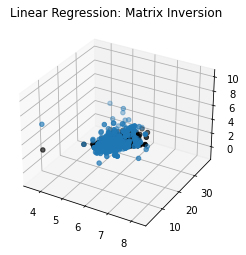

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.61031186]
 [ 0.6409269 ]
 [-0.94593768]]
Normalized training error =  0.02791472538113685
Normalized testing error =  0.16953116677543564


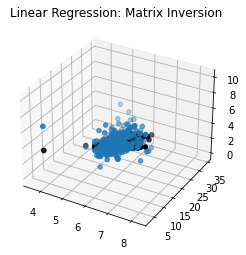

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.63071649]
 [ 0.63901597]
 [-0.91722196]]
Normalized training error =  0.029002429285413817
Normalized testing error =  0.16508251536423382


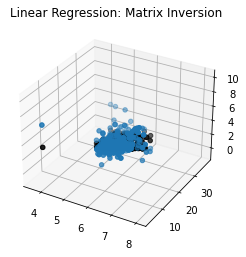

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.6095    ]
 [ 0.65999863]
 [-0.88452618]]
Normalized training error =  0.02894144291286194
Normalized testing error =  0.17638980686753308


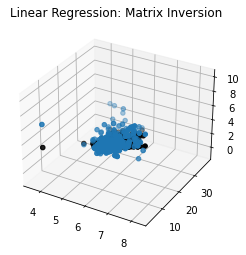

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.56814948]
 [ 0.62362978]
 [-0.8840188 ]]
Normalized training error =  0.03150900663333708
Normalized testing error =  0.18883177856738886


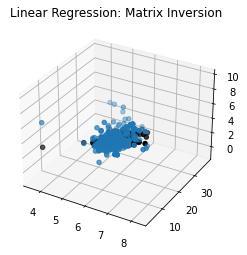

 Feature 0-2 
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.57675515]
 [ 1.07815994]
 [-0.4996366 ]]
Normalized training error =  0.03481844436277158
Normalized testing error =  0.23298081400904117


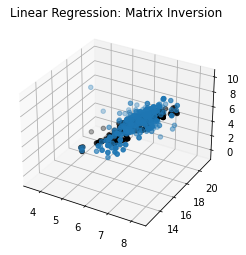

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.61031186]
 [ 0.97301635]
 [-0.58437693]]
Normalized training error =  0.037481962962426105
Normalized testing error =  0.14653241753719398


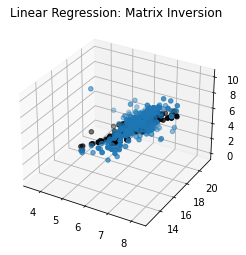

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.63071649]
 [ 0.97212254]
 [-0.55526612]]
Normalized training error =  0.03802592823039859
Normalized testing error =  0.14875397753363157


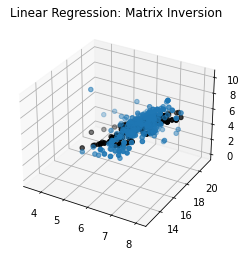

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.6095    ]
 [ 1.01322013]
 [-0.48778233]]
Normalized training error =  0.03878613718367739
Normalized testing error =  0.1545883196467138


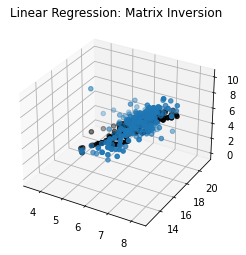

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.56814948]
 [ 0.99622726]
 [-0.48519348]]
Normalized training error =  0.042049817213276594
Normalized testing error =  0.19375054932088176


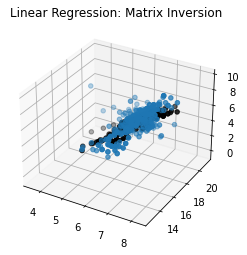

 Feature 0-1 
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.57675515]
 [-1.13860056]
 [-0.45958429]]
Normalized training error =  0.031568738302164674
Normalized testing error =  0.22350946845298206


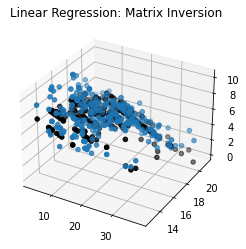

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.61031186]
 [-1.1181451 ]
 [-0.48952299]]
Normalized training error =  0.030235489136060105
Normalized testing error =  0.16425452961622378


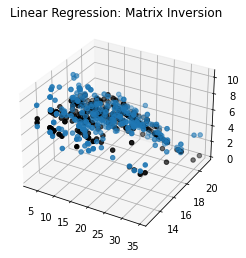

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.63071649]
 [-1.10228589]
 [-0.47682878]]
Normalized training error =  0.03139242327250705
Normalized testing error =  0.1637556886473509


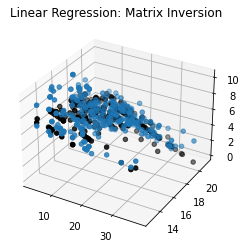

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.6095    ]
 [-1.11690307]
 [-0.41210796]]
Normalized training error =  0.03349273001319942
Normalized testing error =  0.17878328864872234


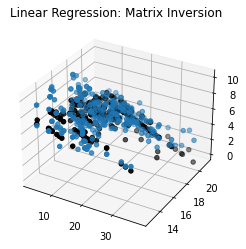

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[[ 4.56814948]
 [-1.11205749]
 [-0.37018791]]
Normalized training error =  0.03635761302036567
Normalized testing error =  0.17231779630217864


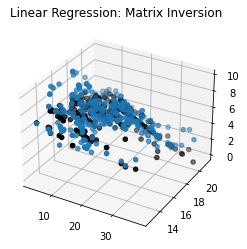

In [25]:
#Feature 0-1
print(" Feature 0-1 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,1,f,df)
    Lin_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)
#Feature 0-2
print(" Feature 0-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,2,f,df)
    Lin_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)
#Feature 1-2
print(" Feature 0-1 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(1,2,f,df)
    Lin_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)

In [30]:
def Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,x0_train,x1_train):
    print("Gradient Descent Method ")
    lr = 0.01
    reg=regression()
    w_pred,err = reg.Regression_grad_des(x_train_norm_aug.T,y_train,lr)
    print("Parameters:")
    print(w_pred)
    plt.xlim(right=70) 
    plt.title("error")
    plt.plot(err)
    plt.show()
    train_error = reg.error(w_pred, y_train, x_train_norm_aug.T)/((np.max(y_train)-np.mean(y_train))**2)
    test_error = reg.error(w_pred, y_test, x_test_norm_aug.T)/((np.max(y_test)-np.mean(y_test))**2)

    print('Normalized training error = ', train_error)
    print('Normalized testing error = ', test_error)

    ypred = np.dot(x_train_norm_aug, w_pred)
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(x0_train, x1_train, y_train)
    ax.scatter3D(x0_train, x1_train, ypred,color='black')
    plt.title("Linear Regression: Gradient Descent")
    plt.show()


 Feature 0-1 
1  - Fold
Gradient Descent Method 
Parameters:
[[ 4.57675515]
 [ 0.72140767]
 [-0.86220803]]


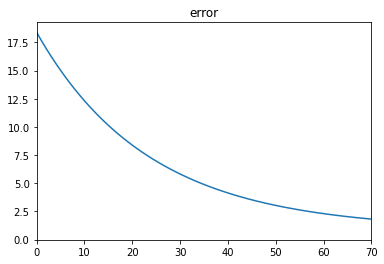

Normalized training error =  0.027123564334683593
Normalized testing error =  0.22329772901088837


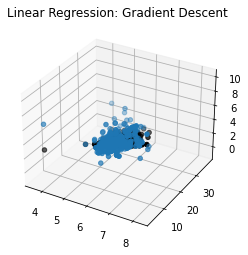

2  - Fold
Gradient Descent Method 
Parameters:
[[ 4.61031185]
 [ 0.64115578]
 [-0.94570879]]


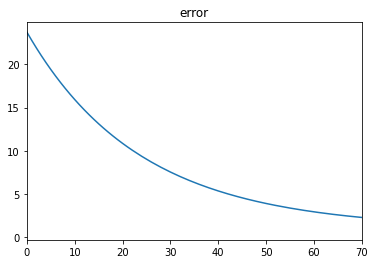

Normalized training error =  0.027914726787196014
Normalized testing error =  0.16952673105457564


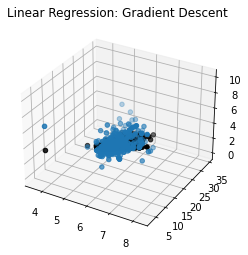

3  - Fold
Gradient Descent Method 
Parameters:
[[ 4.63071649]
 [ 0.63925901]
 [-0.91697892]]


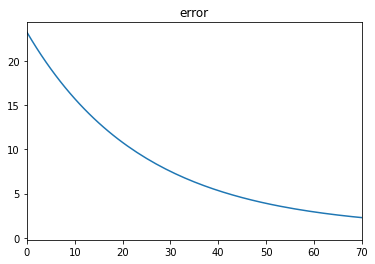

Normalized training error =  0.029002430823996433
Normalized testing error =  0.16507882586890432


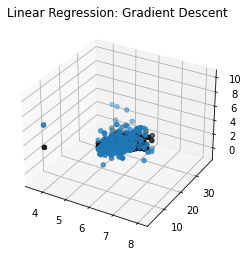

4  - Fold
Gradient Descent Method 
Parameters:
[[ 4.60949999]
 [ 0.66018664]
 [-0.88433816]]


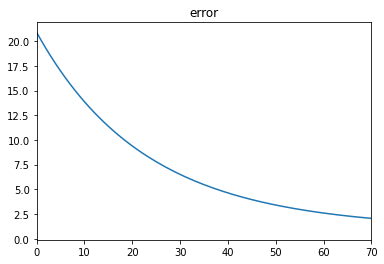

Normalized training error =  0.028941443865267175
Normalized testing error =  0.1763846517059252


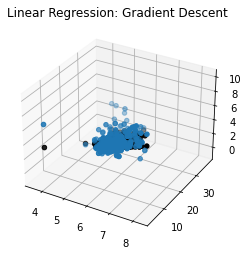

5  - Fold
Gradient Descent Method 
Parameters:
[[ 4.56814948]
 [ 0.62378796]
 [-0.88386063]]


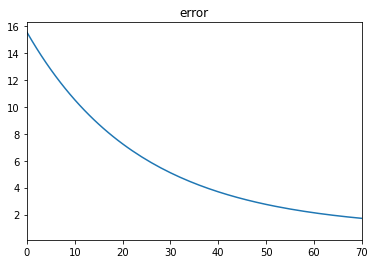

Normalized training error =  0.03150900736165814
Normalized testing error =  0.18883462275474278


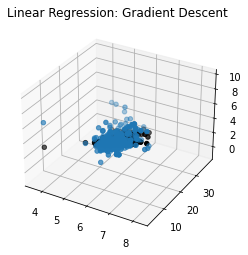

 Feature 0-2 
1  - Fold
Gradient Descent Method 
Parameters:
[[ 4.57675515]
 [ 1.07816031]
 [-0.49963623]]


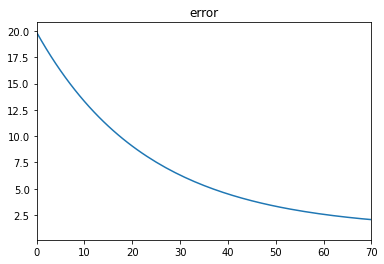

Normalized training error =  0.034818444362777284
Normalized testing error =  0.2329808293806828


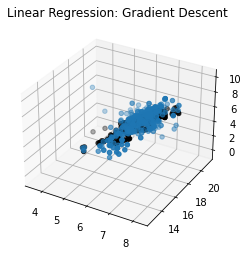

2  - Fold
Gradient Descent Method 
Parameters:
[[ 4.61031185]
 [ 0.97301718]
 [-0.5843761 ]]


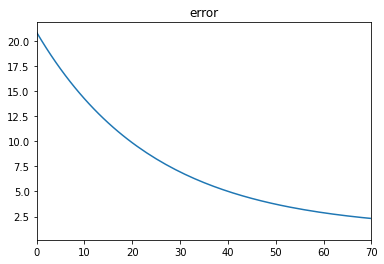

Normalized training error =  0.03748196296245375
Normalized testing error =  0.14653242756494325


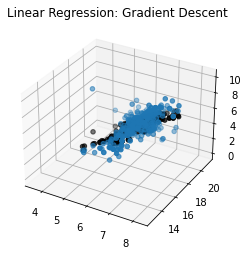

3  - Fold
Gradient Descent Method 
Parameters:
[[ 4.63071649]
 [ 0.97212332]
 [-0.55526533]]


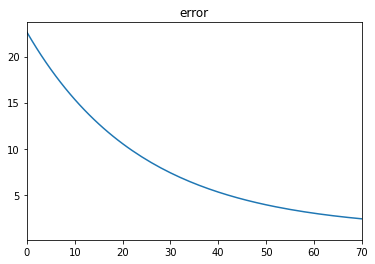

Normalized training error =  0.038025928230423015
Normalized testing error =  0.14875398583799931


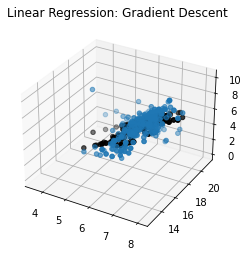

4  - Fold
Gradient Descent Method 
Parameters:
[[ 4.60949999]
 [ 1.01322055]
 [-0.48778191]]


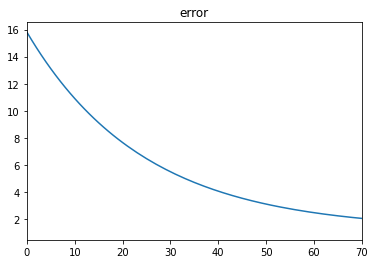

Normalized training error =  0.038786137183685176
Normalized testing error =  0.15458832443035406


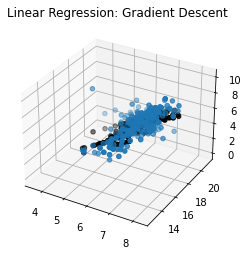

5  - Fold
Gradient Descent Method 
Parameters:
[[ 4.56814948]
 [ 0.9962274 ]
 [-0.48519334]]


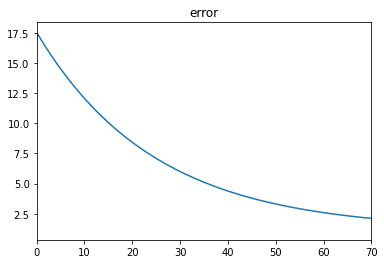

Normalized training error =  0.04204981721327747
Normalized testing error =  0.19375055604811672


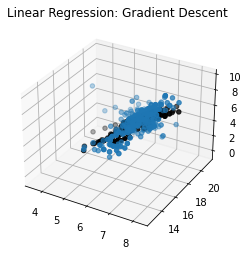

 Feature 1-2 
1  - Fold
Gradient Descent Method 
Parameters:
[[ 4.57675515]
 [-1.13860001]
 [-0.45958483]]


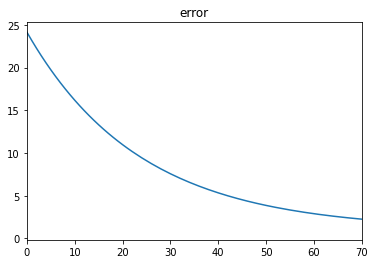

Normalized training error =  0.03156873830217674
Normalized testing error =  0.2235094613711919


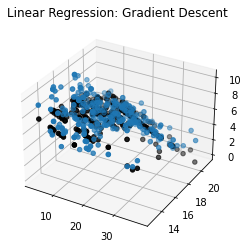

2  - Fold
Gradient Descent Method 
Parameters:
[[ 4.61031185]
 [-1.11814317]
 [-0.48952492]]


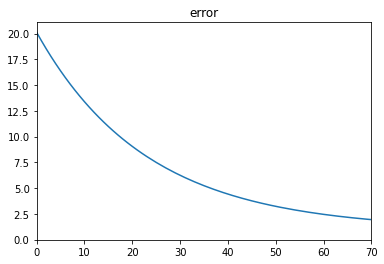

Normalized training error =  0.030235489136201204
Normalized testing error =  0.16425445811671446


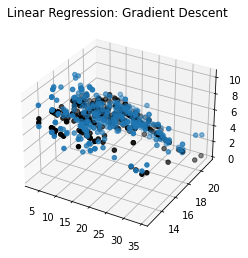

3  - Fold
Gradient Descent Method 
Parameters:
[[ 4.63071649]
 [-1.10228339]
 [-0.47683128]]


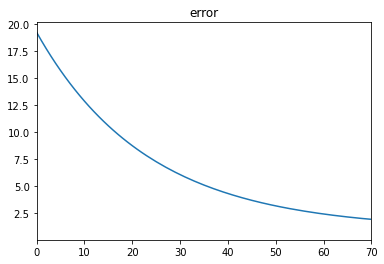

Normalized training error =  0.03139242327274475
Normalized testing error =  0.16375562013777648


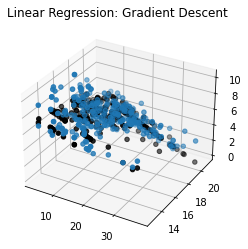

4  - Fold
Gradient Descent Method 
Parameters:
[[ 4.60949999]
 [-1.11690256]
 [-0.41210847]]


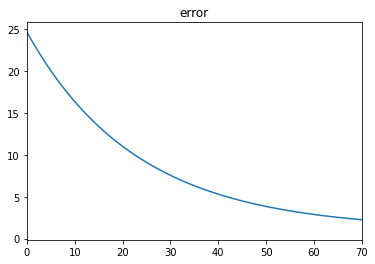

Normalized training error =  0.03349273001320977
Normalized testing error =  0.17878326681406428


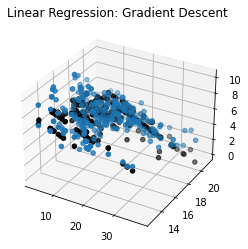

5  - Fold
Gradient Descent Method 
Parameters:
[[ 4.56814948]
 [-1.11205559]
 [-0.3701898 ]]


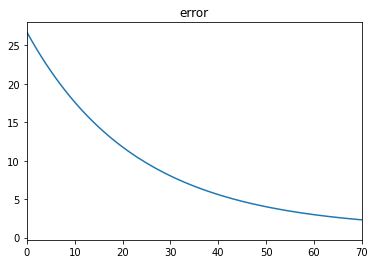

Normalized training error =  0.036357613020523406
Normalized testing error =  0.1723177398872636


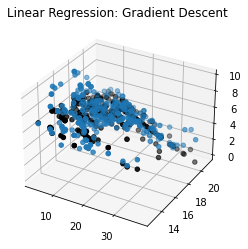

In [31]:
#Feature 0-1
print(" Feature 0-1 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,1,f,df)
    Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)
#Feature 0-2
print(" Feature 0-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,2,f,df)
    Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)
#Feature 1-2
print(" Feature 1-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(1,2,f,df)
    Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train)

Polynomial Bivariate Regression

In [64]:
def data_transform(X,degree): 
    X_new=np.ones((X.shape[0],1))
    for i in range(1,degree+1): 
        X_new = np.c_[X_new,X**i]
    return X_new.T

def Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,x0_train,x1_train,deg):
    reg=regression()
    for degree in range(0,deg+1):
        print("degree: ",degree)
        X_1=data_transform(x_train_norm,degree)
        w_mat = reg.mat_inv(y_train, X_1)
        print("Parameters")
        print(w_mat)
        y_pred=X_1.T @ w_mat
        plt.title(degree)
        ax = plt.axes(projection='3d')
        ax.scatter3D(x0_train, x1_train, y_train)
        ax.scatter3D(x0_train, x1_train, y_pred,color='black')
        plt.title(degree)
        plt.show()
        train_error = reg.error(w_mat, y_train, X_1)/((np.max(y_train)-np.mean(y_train))**2)
        X_1=data_transform(x_test_norm,degree)
        test_error = reg.error(w_mat, y_test, X_1)/((np.max(y_test)-np.mean(y_test))**2)
        print('Normalized training error = ', train_error)
        print('Normalized testing error = ', test_error)
        
def Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,x0_train,x1_train,deg):
    reg=regression()
    lr = 0.01
    for degree in range(0,deg+1):
        print("degree: ",degree)
        X_0=data_transform(x_train_norm,degree)
        w_pred,err = reg.Regression_grad_des(X_0,y_train,lr)
        print("Parameters")
        print(w_pred)
        #plt.xlim(right=70)
        #plt.title("error")
        #plt.plot(err)
        #plt.show()
        y_pred=X_0.T @ w_pred
        plt.title(degree)
        ax = plt.axes(projection='3d')
        ax.scatter3D(x0_train, x1_train, y_train)
        ax.scatter3D(x0_train, x1_train, y_pred,color='black')
        plt.title(degree)
        plt.show()
        train_error = reg.error(w_pred, y_train, X_0)/((np.max(y_train)-np.mean(y_train))**2)
        X_0=data_transform(x_test_norm,degree)
        test_error = reg.error(w_pred, y_test, X_0)/((np.max(y_test)-np.mean(y_test))**2)
        print('Normalized training error = ', train_error)
        print('Normalized testing error = ', test_error) 

Polynomial Regression:Matrix Inversion
 Feature 0-1 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


<ipython-input-59-03391e3e1b06>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


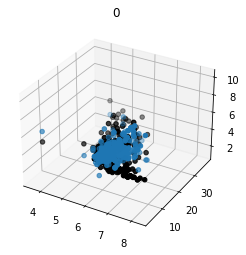

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
degree:  1
Parameters
[[ 4.57675515]
 [ 0.72133196]
 [-0.86228375]]


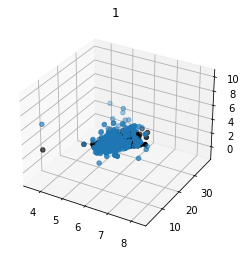

Normalized training error =  0.02712356419478293
Normalized testing error =  0.2232966165302374
degree:  2
Parameters
[[ 4.21048307]
 [ 0.57829211]
 [-1.0384045 ]
 [ 0.23297263]
 [ 0.13329946]]


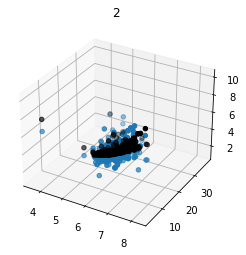

Normalized training error =  0.01817285603485403
Normalized testing error =  0.23283729802425437
degree:  3
Parameters
[[ 4.19919245]
 [ 0.49484762]
 [-1.07363768]
 [ 0.24553112]
 [ 0.11854814]
 [ 0.01683951]
 [ 0.00973124]]


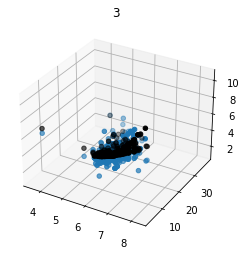

Normalized training error =  0.018020488648924284
Normalized testing error =  0.23043337439293912
2  - Fold
degree:  0
Parameters
[[4.61031186]]


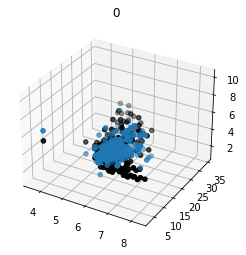

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458397
degree:  1
Parameters
[[ 4.61031186]
 [ 0.6409269 ]
 [-0.94593768]]


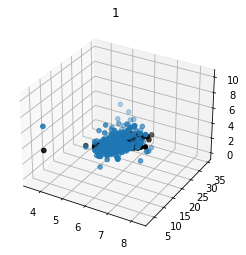

Normalized training error =  0.02791472538113685
Normalized testing error =  0.16953116677543564
degree:  2
Parameters
[[ 4.23285264]
 [ 0.57152307]
 [-1.07268692]
 [ 0.22035349]
 [ 0.15710573]]


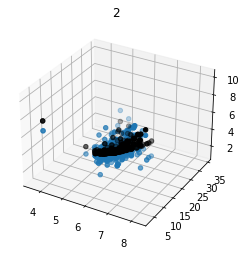

Normalized training error =  0.018406885786882897
Normalized testing error =  0.1669306734395068
degree:  3
Parameters
[[ 4.23944781]
 [ 0.47388377]
 [-1.14359077]
 [ 0.24938536]
 [ 0.0923202 ]
 [ 0.02073255]
 [ 0.03216788]]


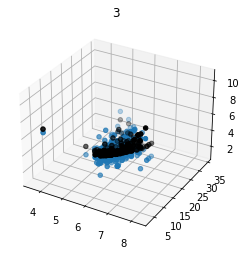

Normalized training error =  0.018073665298401067
Normalized testing error =  0.1661289123855139
3  - Fold
degree:  0
Parameters
[[4.63071649]]


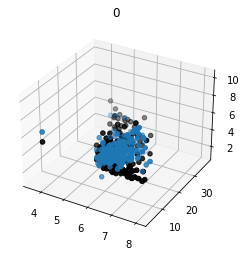

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
degree:  1
Parameters
[[ 4.63071649]
 [ 0.63901597]
 [-0.91722196]]


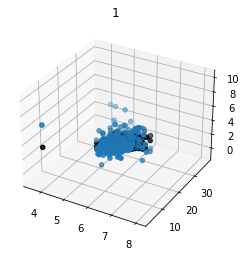

Normalized training error =  0.029002429285413817
Normalized testing error =  0.16508251536423382
degree:  2
Parameters
[[ 4.25319972]
 [ 0.60758886]
 [-1.03281407]
 [ 0.24691445]
 [ 0.13060233]]


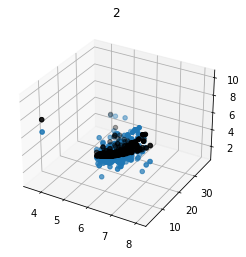

Normalized training error =  0.01792747831688997
Normalized testing error =  0.18255516768227234
degree:  3
Parameters
[[ 4.21642759]
 [ 0.42366569]
 [-1.09405699]
 [ 0.29839583]
 [ 0.10575466]
 [ 0.03379309]
 [ 0.01077897]]


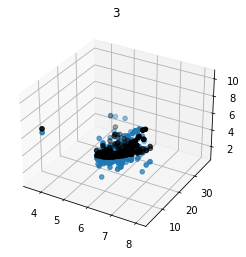

Normalized training error =  0.017327625678564107
Normalized testing error =  0.1879175965490448
4  - Fold
degree:  0
Parameters
[[4.6095]]


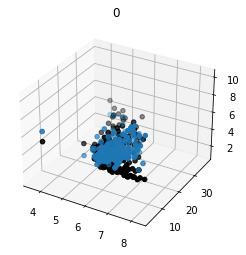

Normalized training error =  0.08995252213172565
Normalized testing error =  0.10598898715323272
degree:  1
Parameters
[[ 4.6095    ]
 [ 0.65999863]
 [-0.88452618]]


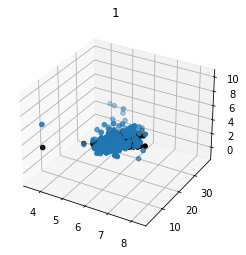

Normalized training error =  0.02894144291286194
Normalized testing error =  0.17638980686753308
degree:  2
Parameters
[[ 4.21531816]
 [ 0.57672258]
 [-1.0574777 ]
 [ 0.23032457]
 [ 0.16385726]]


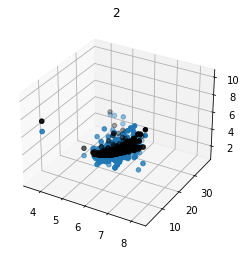

Normalized training error =  0.017229689645350918
Normalized testing error =  0.182135514925296
degree:  3
Parameters
[[ 4.19936529]
 [ 0.44206818]
 [-1.10658181]
 [ 0.2622447 ]
 [ 0.12981631]
 [ 0.02507785]
 [ 0.01477306]]


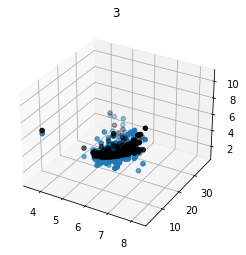

Normalized training error =  0.01685994987288882
Normalized testing error =  0.1793222236359937
5  - Fold
degree:  0
Parameters
[[4.56814948]]


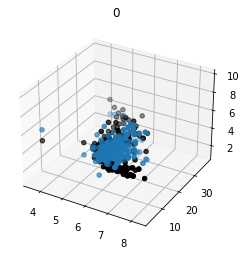

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038014
degree:  1
Parameters
[[ 4.56814948]
 [ 0.62362978]
 [-0.8840188 ]]


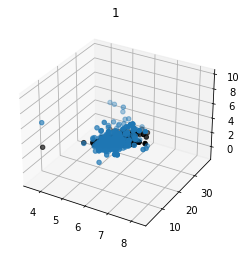

Normalized training error =  0.03150900663333708
Normalized testing error =  0.18883177856738886
degree:  2
Parameters
[[ 4.18998192]
 [ 0.51914046]
 [-1.0703648 ]
 [ 0.24144149]
 [ 0.13672607]]


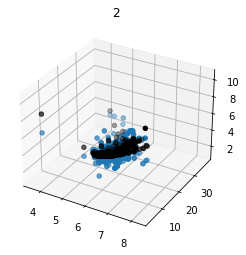

Normalized training error =  0.019396585352007535
Normalized testing error =  0.22003074397020497
degree:  3
Parameters
[[ 4.1555842 ]
 [ 0.32590694]
 [-1.1491878 ]
 [ 0.27888481]
 [ 0.11168446]
 [ 0.0360583 ]
 [ 0.01706571]]


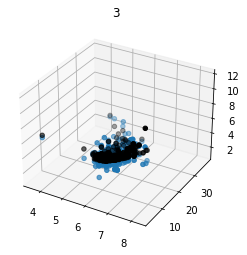

Normalized training error =  0.018429802936163527
Normalized testing error =  0.2270116176446629
 Feature 0-2 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


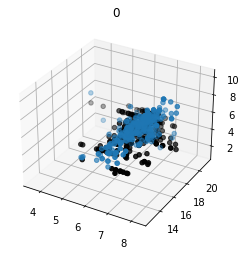

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
degree:  1
Parameters
[[ 4.57675515]
 [ 1.07815994]
 [-0.4996366 ]]


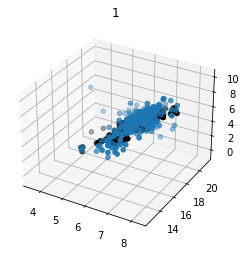

Normalized training error =  0.03481844436277158
Normalized testing error =  0.23298081400904117
degree:  2
Parameters
[[ 4.50275183]
 [ 1.01001068]
 [-0.58908993]
 [ 0.23238174]
 [-0.15837842]]


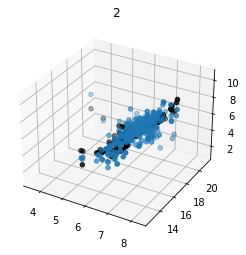

Normalized training error =  0.028212672049918983
Normalized testing error =  0.2247424651521377
degree:  3
Parameters
[[ 4.49831558]
 [ 1.1064995 ]
 [-0.63091503]
 [ 0.21789336]
 [-0.10672092]
 [-0.01984168]
 [ 0.03109178]]


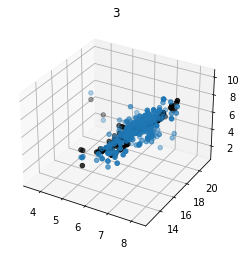

Normalized training error =  0.027955345525202246
Normalized testing error =  0.22630776539425512
degree:  4
Parameters
[[ 4.61383969e+00]
 [ 1.03055549e+00]
 [-1.33417923e+00]
 [ 2.02141421e-01]
 [-3.57378679e-01]
 [-1.72728552e-02]
 [ 5.87773010e-01]
 [ 1.47166653e-03]
 [ 2.15379699e-01]]


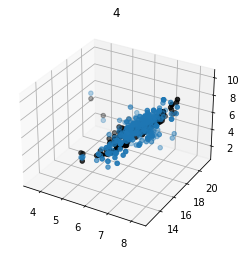

Normalized training error =  0.02561517474478889
Normalized testing error =  0.23551635726102552
2  - Fold
degree:  0
Parameters
[[4.61031186]]


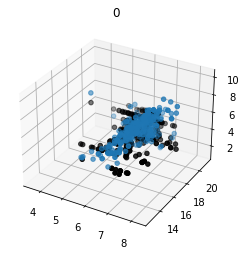

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458397
degree:  1
Parameters
[[ 4.61031186]
 [ 0.97301635]
 [-0.58437693]]


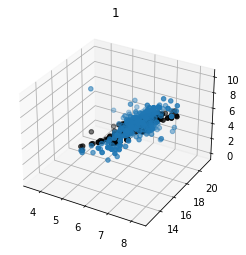

Normalized training error =  0.037481962962426105
Normalized testing error =  0.14653241753719398
degree:  2
Parameters
[[ 4.50718216]
 [ 0.94945703]
 [-0.65457058]
 [ 0.26156692]
 [-0.15843722]]


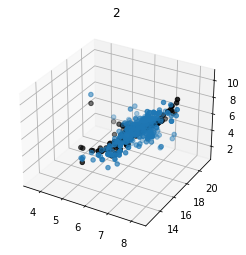

Normalized training error =  0.028459297097609436
Normalized testing error =  0.15511801247461304
degree:  3
Parameters
[[ 4.52509613]
 [ 1.07202191]
 [-0.6724323 ]
 [ 0.23271203]
 [-0.13065548]
 [-0.02379099]
 [ 0.01577293]]


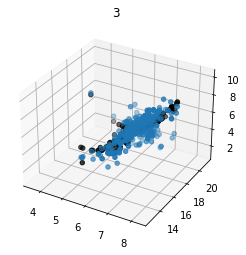

Normalized training error =  0.02807392789330446
Normalized testing error =  0.15619274281746798
degree:  4
Parameters
[[ 4.62289813e+00]
 [ 1.01132772e+00]
 [-1.28648716e+00]
 [ 2.51744399e-01]
 [-3.78309145e-01]
 [-2.55598263e-02]
 [ 4.99169103e-01]
 [-1.52675185e-03]
 [ 1.89252829e-01]]


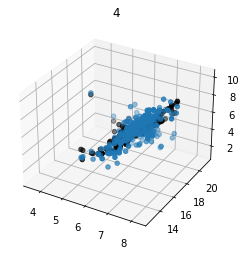

Normalized training error =  0.026175035518950052
Normalized testing error =  0.15984202156590566
3  - Fold
degree:  0
Parameters
[[4.63071649]]


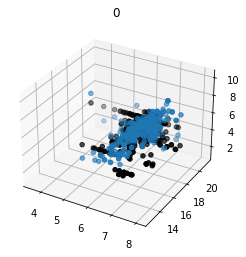

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
degree:  1
Parameters
[[ 4.63071649]
 [ 0.97212254]
 [-0.55526612]]


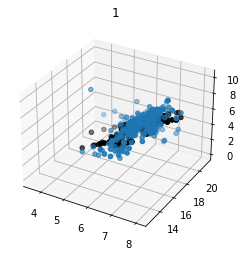

Normalized training error =  0.03802592823039859
Normalized testing error =  0.14875397753363157
degree:  2
Parameters
[[ 4.5423552 ]
 [ 0.99313593]
 [-0.63773755]
 [ 0.27502918]
 [-0.18666789]]


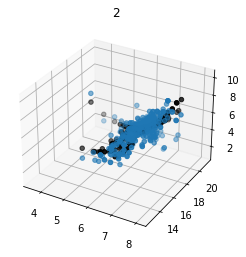

Normalized training error =  0.02780419591990093
Normalized testing error =  0.17291328520732394
degree:  3
Parameters
[[ 4.56981880e+00]
 [ 1.07783556e+00]
 [-6.39033267e-01]
 [ 2.48358358e-01]
 [-1.87089322e-01]
 [-1.75439143e-02]
 [ 9.89588243e-05]]


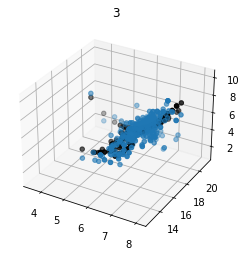

Normalized training error =  0.027626919841857972
Normalized testing error =  0.17130316427201175
degree:  4
Parameters
[[ 4.66488979e+00]
 [ 9.81193136e-01]
 [-1.19360508e+00]
 [ 2.21859302e-01]
 [-3.78978509e-01]
 [-6.69959828e-03]
 [ 4.41290842e-01]
 [ 3.63755261e-03]
 [ 1.69498310e-01]]


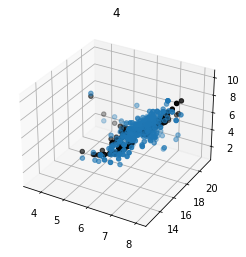

Normalized training error =  0.026177304311358975
Normalized testing error =  0.17051238832102428
4  - Fold
degree:  0
Parameters
[[4.6095]]


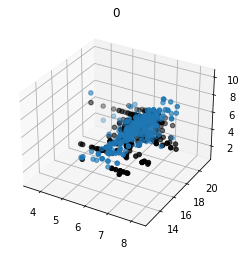

Normalized training error =  0.08995252213172565
Normalized testing error =  0.10598898715323272
degree:  1
Parameters
[[ 4.6095    ]
 [ 1.01322013]
 [-0.48778233]]


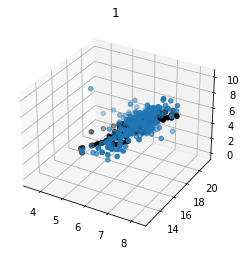

Normalized training error =  0.03878613718367739
Normalized testing error =  0.1545883196467138
degree:  2
Parameters
[[ 4.46958458]
 [ 0.98369614]
 [-0.53133317]
 [ 0.27726115]
 [-0.13734573]]


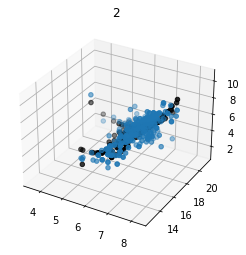

Normalized training error =  0.028423615315698512
Normalized testing error =  0.1573172799382764
degree:  3
Parameters
[[ 4.49900137e+00]
 [ 1.07551008e+00]
 [-5.28017018e-01]
 [ 2.54696597e-01]
 [-1.44644149e-01]
 [-1.77743957e-02]
 [-3.69274393e-03]]


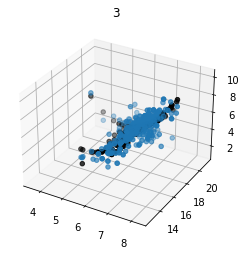

Normalized training error =  0.028228463385110085
Normalized testing error =  0.16023887671351464
degree:  4
Parameters
[[ 4.60232438e+00]
 [ 1.00844402e+00]
 [-1.10515757e+00]
 [ 2.67050707e-01]
 [-3.92625929e-01]
 [-1.84902054e-02]
 [ 4.53499779e-01]
 [-1.23774112e-03]
 [ 1.87396849e-01]]


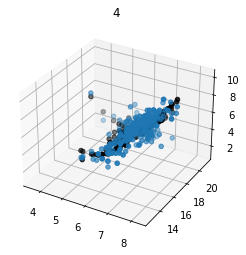

Normalized training error =  0.026620253178429164
Normalized testing error =  0.16553291246066204
5  - Fold
degree:  0
Parameters
[[4.56814948]]


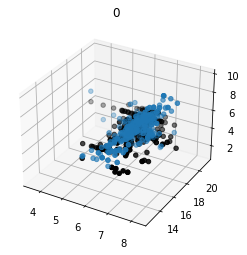

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038014
degree:  1
Parameters
[[ 4.56814948]
 [ 0.99622726]
 [-0.48519348]]


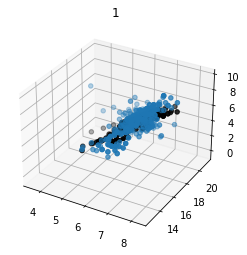

Normalized training error =  0.042049817213276594
Normalized testing error =  0.19375054932088176
degree:  2
Parameters
[[ 4.54556979]
 [ 0.95007823]
 [-0.62152971]
 [ 0.25149408]
 [-0.22891438]]


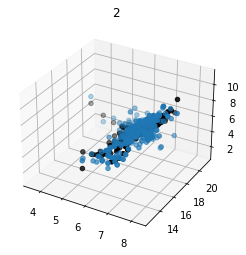

Normalized training error =  0.03147950008104234
Normalized testing error =  0.213222085010736
degree:  3
Parameters
[[ 4.54640308e+00]
 [ 9.67278228e-01]
 [-6.26836896e-01]
 [ 2.47822230e-01]
 [-2.22568544e-01]
 [-3.40024825e-03]
 [ 3.73322410e-03]]


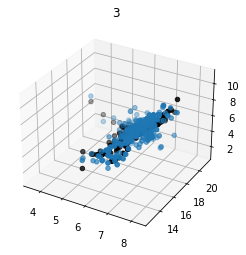

Normalized training error =  0.03146968898917304
Normalized testing error =  0.21251033223791732
degree:  4
Parameters
[[ 4.68126440e+00]
 [ 8.68824585e-01]
 [-1.30962252e+00]
 [ 2.19301541e-01]
 [-5.07366667e-01]
 [ 3.44209056e-03]
 [ 5.18130705e-01]
 [ 2.68389154e-03]
 [ 2.04045328e-01]]


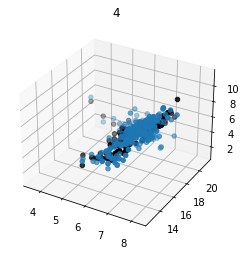

Normalized training error =  0.028766185020242543
Normalized testing error =  0.21179954554538652
 Feature 1-2 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


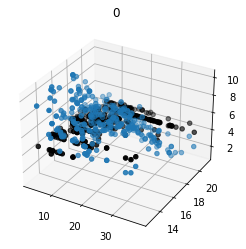

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
degree:  1
Parameters
[[ 4.57675515]
 [-1.13860056]
 [-0.45958429]]


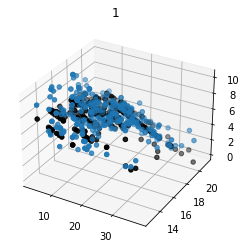

Normalized training error =  0.031568738302164674
Normalized testing error =  0.22350946845298206
degree:  2
Parameters
[[ 4.17527824]
 [-1.47935895]
 [-0.32690953]
 [ 0.34500431]
 [ 0.05647261]]


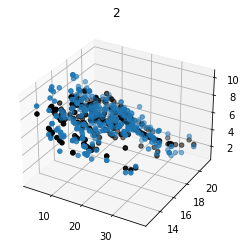

Normalized training error =  0.02525466313028988
Normalized testing error =  0.23876992616442091
degree:  3
Parameters
[[ 4.12130455]
 [-1.2734743 ]
 [-0.18211787]
 [ 0.57030279]
 [-0.09462613]
 [-0.11675309]
 [-0.09330395]]


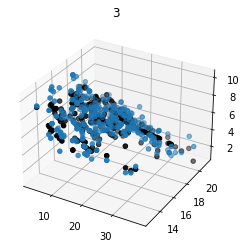

Normalized training error =  0.023656102877719975
Normalized testing error =  0.24178733421056506
2  - Fold
degree:  0
Parameters
[[4.61031186]]


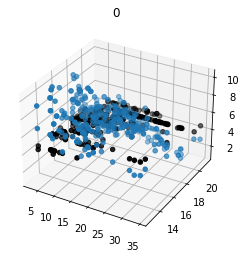

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458397
degree:  1
Parameters
[[ 4.61031186]
 [-1.1181451 ]
 [-0.48952299]]


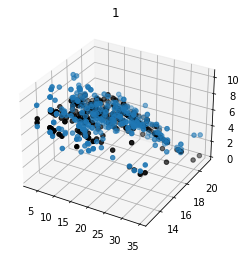

Normalized training error =  0.030235489136060105
Normalized testing error =  0.16425452961622378
degree:  2
Parameters
[[ 4.21017992]
 [-1.45151289]
 [-0.31879481]
 [ 0.33132064]
 [ 0.0688113 ]]


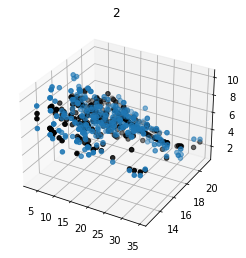

Normalized training error =  0.02477116071744237
Normalized testing error =  0.15649077388349428
degree:  3
Parameters
[[ 4.17150063]
 [-1.23858601]
 [-0.22819187]
 [ 0.53059335]
 [-0.05969942]
 [-0.11291525]
 [-0.0701341 ]]


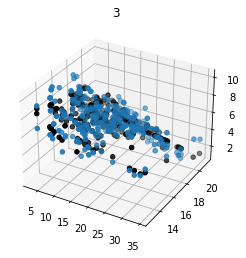

Normalized training error =  0.02356967077022733
Normalized testing error =  0.16315264531691537
3  - Fold
degree:  0
Parameters
[[4.63071649]]


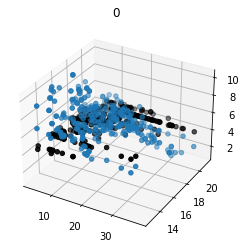

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
degree:  1
Parameters
[[ 4.63071649]
 [-1.10228589]
 [-0.47682878]]


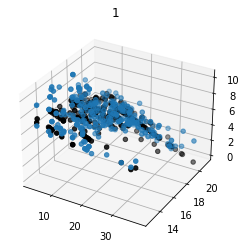

Normalized training error =  0.03139242327250705
Normalized testing error =  0.1637556886473509
degree:  2
Parameters
[[ 4.21804398]
 [-1.4571057 ]
 [-0.2872149 ]
 [ 0.32257067]
 [ 0.09010185]]


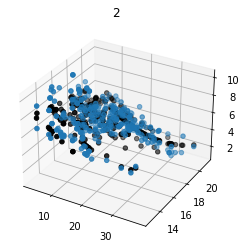

Normalized training error =  0.02551507597179127
Normalized testing error =  0.16750304778537722
degree:  3
Parameters
[[ 4.21316382]
 [-1.27251044]
 [-0.1258745 ]
 [ 0.52927719]
 [-0.12864192]
 [-0.10216387]
 [-0.12019018]]


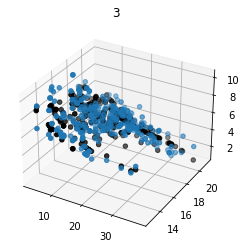

Normalized training error =  0.023878065428511
Normalized testing error =  0.1687411498955441
4  - Fold
degree:  0
Parameters
[[4.6095]]


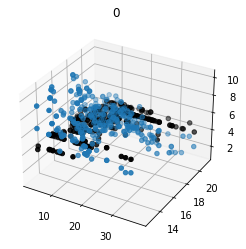

Normalized training error =  0.08995252213172565
Normalized testing error =  0.10598898715323272
degree:  1
Parameters
[[ 4.6095    ]
 [-1.11690307]
 [-0.41210796]]


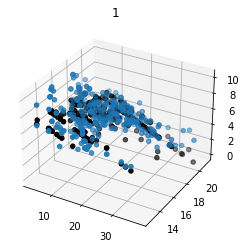

Normalized training error =  0.03349273001319942
Normalized testing error =  0.17878328864872234
degree:  2
Parameters
[[ 4.16241799]
 [-1.53394049]
 [-0.25061634]
 [ 0.37055817]
 [ 0.07652385]]


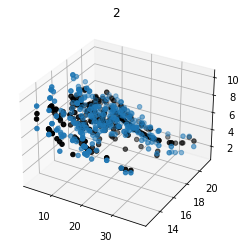

Normalized training error =  0.025053032650417428
Normalized testing error =  0.19403191810545273
degree:  3
Parameters
[[ 4.1102583 ]
 [-1.35560523]
 [-0.15108742]
 [ 0.58176264]
 [-0.04502357]
 [-0.0973814 ]
 [-0.07120281]]


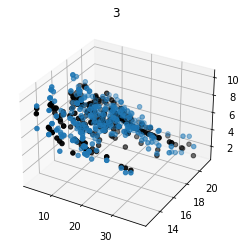

Normalized training error =  0.023737104877726203
Normalized testing error =  0.1922012537915737
5  - Fold
degree:  0
Parameters
[[4.56814948]]


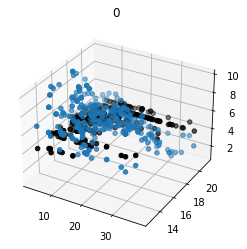

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038014
degree:  1
Parameters
[[ 4.56814948]
 [-1.11205749]
 [-0.37018791]]


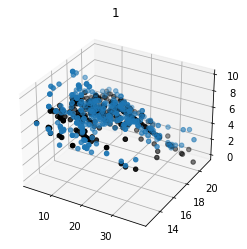

Normalized training error =  0.03635761302036567
Normalized testing error =  0.17231779630217864
degree:  2
Parameters
[[ 4.1947843 ]
 [-1.48388938]
 [-0.24128593]
 [ 0.33625952]
 [ 0.03710566]]


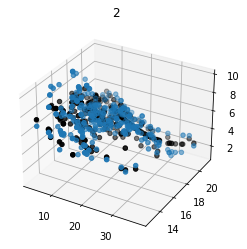

Normalized training error =  0.028976237865794605
Normalized testing error =  0.1857715994305194
degree:  3
Parameters
[[ 4.17054758]
 [-1.34381689]
 [-0.10681556]
 [ 0.51316117]
 [-0.10697236]
 [-0.08140471]
 [-0.08707148]]


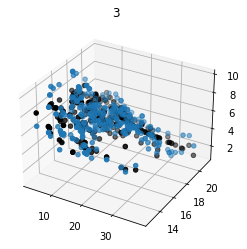

Normalized training error =  0.0277783924996942
Normalized testing error =  0.1880645756189797


In [63]:
#Feature 0-1
print("Polynomial Regression:Matrix Inversion")
print(" Feature 0-1 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,1,f,df)
    Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,3)
#Feature 0-2
print(" Feature 0-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,2,f,df)
    Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,4)
#Feature 1-2
print(" Feature 1-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(1,2,f,df)
    Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,3)
    


Polynomial Regression:Gradient Descent
 Feature 0-1 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


<ipython-input-64-7c56894d5dc6>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


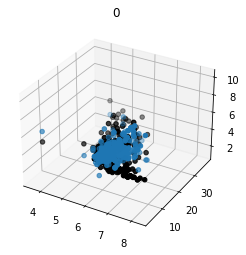

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788921747773
degree:  1
Parameters
[[ 4.57675515]
 [ 0.72162217]
 [-0.86199353]]


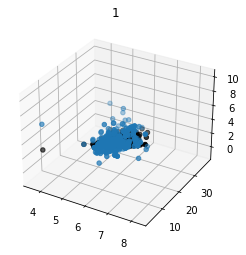

Normalized training error =  0.027123566250185454
Normalized testing error =  0.2233008836163872
degree:  2
Parameters
[[ 4.20955503]
 [ 0.57687391]
 [-1.04059365]
 [ 0.23279964]
 [ 0.13416356]]


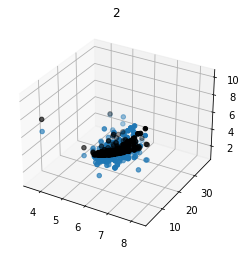

Normalized training error =  0.018172923862579217
Normalized testing error =  0.2328942847034735
degree:  3
Parameters
[[ 4.17949734e+00]
 [ 4.76116910e-01]
 [-1.07451592e+00]
 [ 2.45396765e-01]
 [ 1.40917312e-01]
 [ 1.77603013e-02]
 [ 1.88861717e-03]]


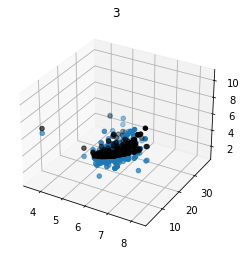

Normalized training error =  0.018028472266934752
Normalized testing error =  0.23036610196508311
2  - Fold
degree:  0
Parameters
[[4.61031185]]


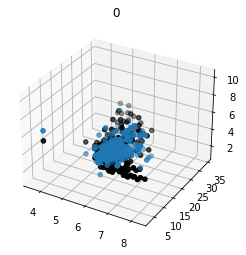

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812434847418
degree:  1
Parameters
[[ 4.61031185]
 [ 0.64111171]
 [-0.94575286]]


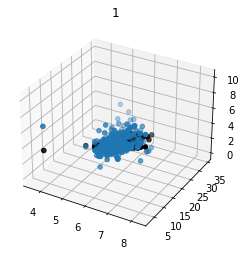

Normalized training error =  0.027914726297848243
Normalized testing error =  0.16952758495670076
degree:  2
Parameters
[[ 4.23252275]
 [ 0.57106911]
 [-1.07340833]
 [ 0.22027883]
 [ 0.15742189]]


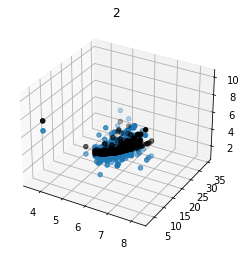

Normalized training error =  0.01840689356521071
Normalized testing error =  0.16693768915301666
degree:  3
Parameters
[[ 4.21768366]
 [ 0.45569965]
 [-1.13485267]
 [ 0.24911721]
 [ 0.11937399]
 [ 0.02166636]
 [ 0.02083971]]


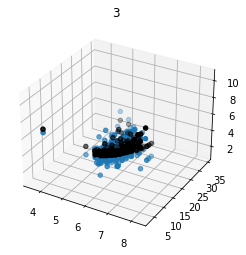

Normalized training error =  0.018084275551137285
Normalized testing error =  0.166190724809032
3  - Fold
degree:  0
Parameters
[[4.63071649]]


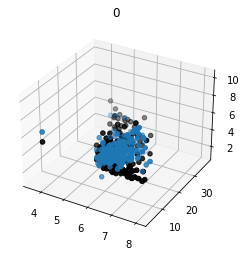

Normalized training error =  0.09224089720379952
Normalized testing error =  0.101372425687754
degree:  1
Parameters
[[ 4.63071649]
 [ 0.63916101]
 [-0.91707691]]


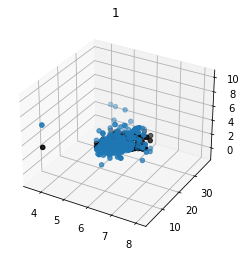

Normalized training error =  0.02900242983339311
Normalized testing error =  0.16508031309535262
degree:  2
Parameters
[[ 4.2527776 ]
 [ 0.60687516]
 [-1.03393562]
 [ 0.24678297]
 [ 0.13104171]]


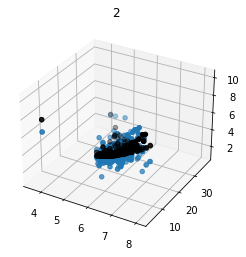

Normalized training error =  0.017927496618410133
Normalized testing error =  0.18256867754465755
degree:  3
Parameters
[[ 4.19954387]
 [ 0.40567309]
 [-1.09683781]
 [ 0.29897816]
 [ 0.12401584]
 [ 0.03491747]
 [ 0.00470234]]


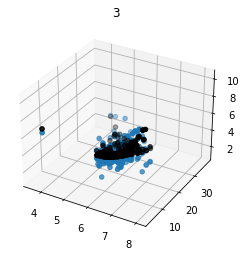

Normalized training error =  0.017333809982878985
Normalized testing error =  0.18802327807538333
4  - Fold
degree:  0
Parameters
[[4.60949999]]


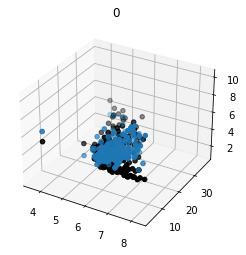

Normalized training error =  0.08995252213172565
Normalized testing error =  0.105988987128607
degree:  1
Parameters
[[ 4.60949999]
 [ 0.66006958]
 [-0.88445523]]


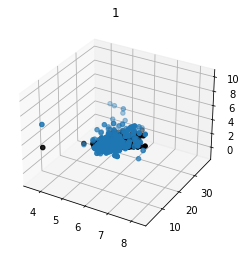

Normalized training error =  0.028941443048491944
Normalized testing error =  0.17638786126421171
degree:  2
Parameters
[[ 4.21575053]
 [ 0.57745548]
 [-1.05625727]
 [ 0.23046989]
 [ 0.16338869]]


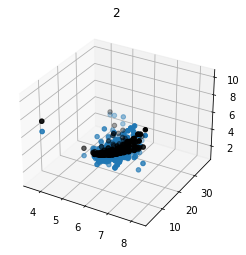

Normalized training error =  0.017229709867895734
Normalized testing error =  0.1820936870769076
degree:  3
Parameters
[[ 4.18419601]
 [ 0.42197259]
 [-1.11399006]
 [ 0.2623031 ]
 [ 0.14666803]
 [ 0.0263192 ]
 [ 0.00990842]]


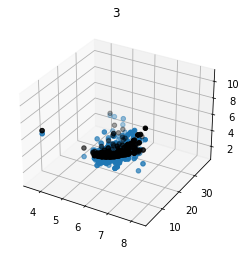

Normalized training error =  0.0168655495936824
Normalized testing error =  0.1793406567100853
5  - Fold
degree:  0
Parameters
[[4.56814948]]


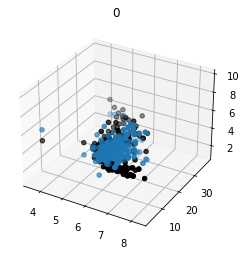

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803472851777
degree:  1
Parameters
[[ 4.56814948]
 [ 0.62393867]
 [-0.88370991]]


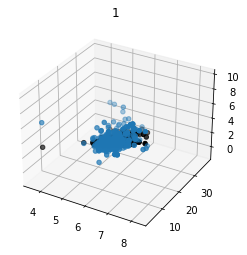

Normalized training error =  0.03150900941087807
Normalized testing error =  0.1888373345591106
degree:  2
Parameters
[[ 4.18984229]
 [ 0.51893128]
 [-1.07070281]
 [ 0.24141312]
 [ 0.1368552 ]]


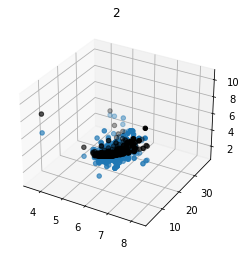

Normalized training error =  0.019396587208038163
Normalized testing error =  0.22003370206233164
degree:  3
Parameters
[[ 4.13626364]
 [ 0.30677832]
 [-1.15269938]
 [ 0.27940652]
 [ 0.1331069 ]
 [ 0.03707438]
 [ 0.01021605]]


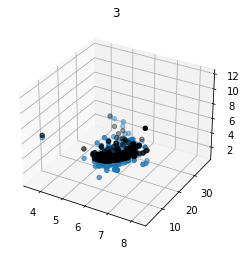

Normalized training error =  0.018438288578290458
Normalized testing error =  0.22725821600199403
 Feature 0-2 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


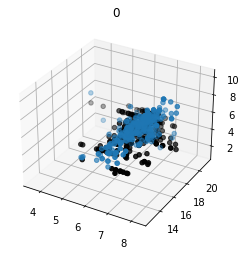

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788921022706
degree:  1
Parameters
[[ 4.57675515]
 [ 1.07816044]
 [-0.4996361 ]]


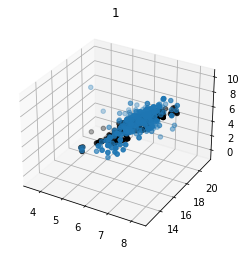

Normalized training error =  0.034818444362782
Normalized testing error =  0.23298083477979956
degree:  2
Parameters
[[ 4.49524177]
 [ 1.01151916]
 [-0.58253352]
 [ 0.23319077]
 [-0.15383378]]


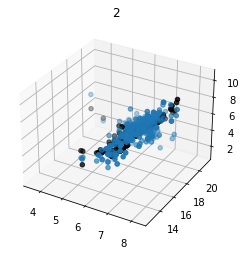

Normalized training error =  0.0282137944088658
Normalized testing error =  0.22473135773716227
degree:  3
Parameters
[[ 4.46424572]
 [ 1.10641661]
 [-0.64805912]
 [ 0.22071214]
 [-0.06692002]
 [-0.0196095 ]
 [ 0.04842627]]


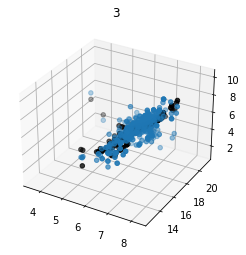

Normalized training error =  0.027973998582308843
Normalized testing error =  0.2266717672569777
2  - Fold
degree:  0
Parameters
[[4.61031185]]


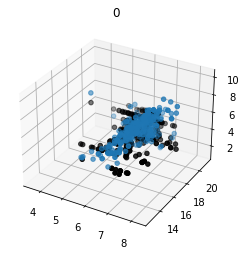

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812434562798
degree:  1
Parameters
[[ 4.61031185]
 [ 0.97301633]
 [-0.58437695]]


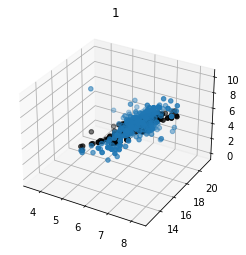

Normalized training error =  0.037481962962426126
Normalized testing error =  0.14653241722376226
degree:  2
Parameters
[[ 4.50154862]
 [ 0.95091047]
 [-0.64938009]
 [ 0.26207327]
 [-0.15498827]]


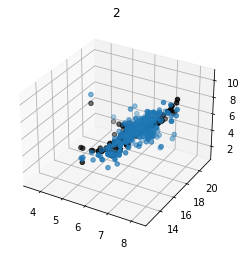

Normalized training error =  0.028459996113441844
Normalized testing error =  0.15504760788523603
degree:  3
Parameters
[[ 4.49294572]
 [ 1.07145331]
 [-0.68927462]
 [ 0.23515999]
 [-0.09320299]
 [-0.02347017]
 [ 0.03198035]]


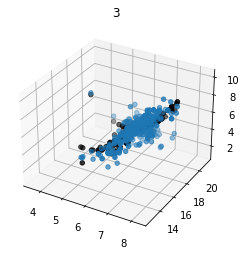

Normalized training error =  0.028091389963422485
Normalized testing error =  0.15627146273363735
3  - Fold
degree:  0
Parameters
[[4.63071649]]


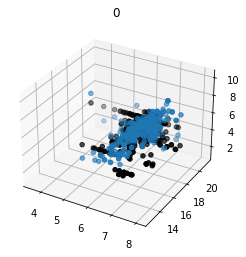

Normalized training error =  0.09224089720379952
Normalized testing error =  0.10137242568569244
degree:  1
Parameters
[[ 4.63071649]
 [ 0.97212396]
 [-0.55526469]]


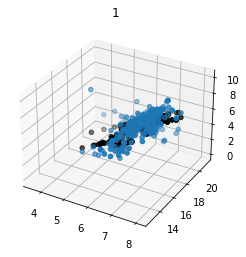

Normalized training error =  0.038025928230479275
Normalized testing error =  0.14875399269265263
degree:  2
Parameters
[[ 4.53495888]
 [ 0.99496643]
 [-0.6307383 ]
 [ 0.27575983]
 [-0.18212223]]


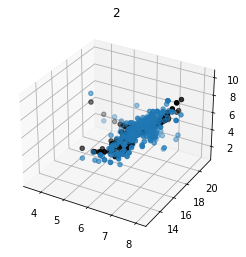

Normalized training error =  0.027805387137232743
Normalized testing error =  0.17274012754432275
degree:  3
Parameters
[[ 4.52412274]
 [ 1.07629398]
 [-0.65936451]
 [ 0.25273504]
 [-0.13359742]
 [-0.01684699]
 [ 0.02280527]]


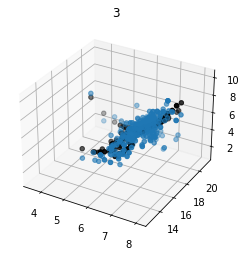

Normalized training error =  0.027659858054532107
Normalized testing error =  0.17104126237615783
4  - Fold
degree:  0
Parameters
[[4.60949999]]


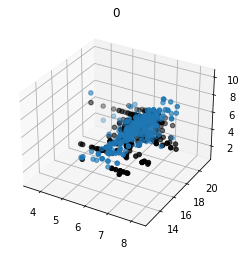

Normalized training error =  0.08995252213172565
Normalized testing error =  0.105988987124902
degree:  1
Parameters
[[ 4.60949999]
 [ 1.01322   ]
 [-0.48778246]]


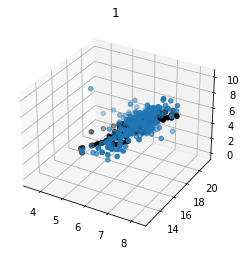

Normalized training error =  0.038786137183678064
Normalized testing error =  0.15458831821560748
degree:  2
Parameters
[[ 4.4615596 ]
 [ 0.98538628]
 [-0.52457784]
 [ 0.27799361]
 [-0.13230511]]


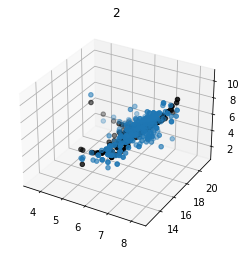

Normalized training error =  0.028424868423377988
Normalized testing error =  0.15727435178556806
degree:  3
Parameters
[[ 4.45246121]
 [ 1.075432  ]
 [-0.55286532]
 [ 0.25842951]
 [-0.09033752]
 [-0.01734164]
 [ 0.02096331]]


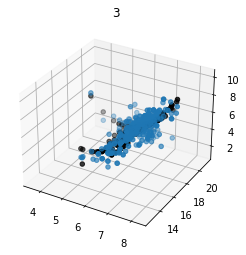

Normalized training error =  0.028263795703111442
Normalized testing error =  0.16018577575770548
5  - Fold
degree:  0
Parameters
[[4.56814948]]


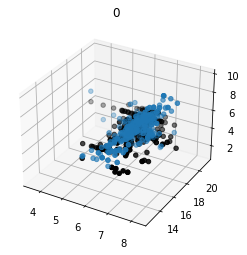

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803472691242
degree:  1
Parameters
[[ 4.56814948]
 [ 0.99622769]
 [-0.48519305]]


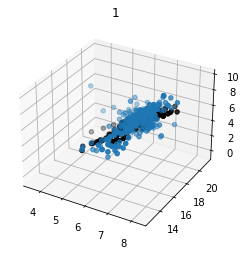

Normalized training error =  0.042049817213285316
Normalized testing error =  0.19375057033065737
degree:  2
Parameters
[[ 4.539558  ]
 [ 0.95142334]
 [-0.6165681 ]
 [ 0.2520695 ]
 [-0.22531477]]


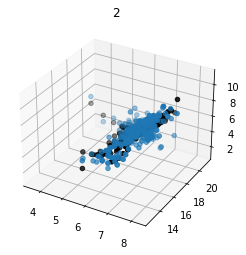

Normalized training error =  0.03148034437778043
Normalized testing error =  0.21328152024277705
degree:  3
Parameters
[[ 4.51764162e+00]
 [ 9.66918157e-01]
 [-6.43359769e-01]
 [ 2.50437605e-01]
 [-1.90696895e-01]
 [-3.09094950e-03]
 [ 1.80119169e-02]]


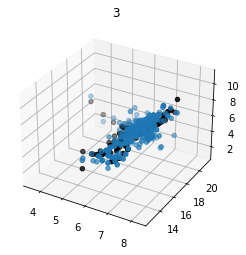

Normalized training error =  0.031485535523574734
Normalized testing error =  0.21293258936064
 Feature 1-2 
1  - Fold
degree:  0
Parameters
[[4.57675515]]


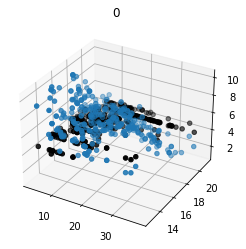

Normalized training error =  0.0916785760578451
Normalized testing error =  0.13523788922154747
degree:  1
Parameters
[[ 4.57675515]
 [-1.13860013]
 [-0.45958472]]


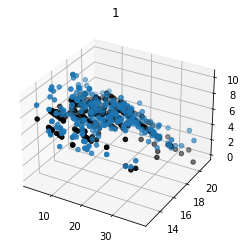

Normalized training error =  0.03156873830217221
Normalized testing error =  0.22350946284768838
degree:  2
Parameters
[[ 4.14950546]
 [-1.49564637]
 [-0.30673838]
 [ 0.35271581]
 [ 0.06936208]]


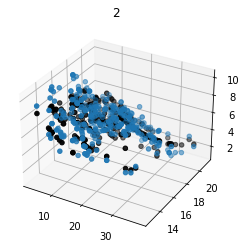

Normalized training error =  0.025264628247979017
Normalized testing error =  0.2393090819692829
degree:  3
Parameters
[[ 4.02865122]
 [-1.27120367]
 [-0.19496847]
 [ 0.60652172]
 [-0.01936361]
 [-0.12817348]
 [-0.06512627]]


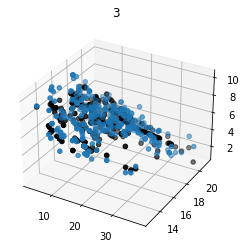

Normalized training error =  0.0237418169100911
Normalized testing error =  0.24273749055625257
2  - Fold
degree:  0
Parameters
[[4.61031185]]


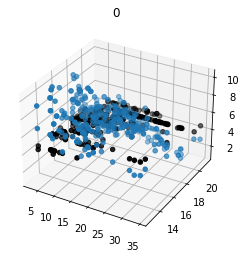

Normalized training error =  0.0926718240459121
Normalized testing error =  0.09372812434510754
degree:  1
Parameters
[[ 4.61031185]
 [-1.11813968]
 [-0.48952841]]


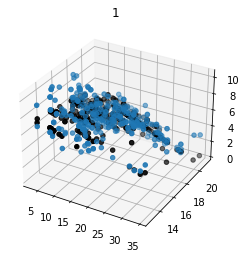

Normalized training error =  0.030235489137171633
Normalized testing error =  0.16425432892997618
degree:  2
Parameters
[[ 4.18613395]
 [-1.46822311]
 [-0.29864059]
 [ 0.33907197]
 [ 0.0803249 ]]


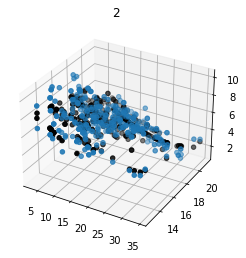

Normalized training error =  0.024780476910785734
Normalized testing error =  0.15667317107856157
degree:  3
Parameters
[[ 4.1042315 ]
 [-1.23639114]
 [-0.23641841]
 [ 0.55747917]
 [-0.00672169]
 [-0.12200631]
 [-0.05035446]]


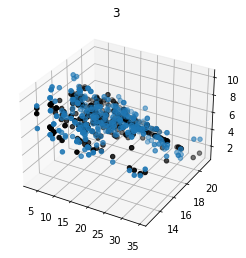

Normalized training error =  0.023617287720521386
Normalized testing error =  0.16388595768755074
3  - Fold
degree:  0
Parameters
[[4.63071649]]


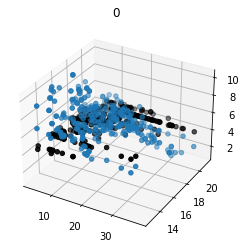

Normalized training error =  0.09224089720379952
Normalized testing error =  0.10137242568016183
degree:  1
Parameters
[[ 4.63071649]
 [-1.10228292]
 [-0.47683175]]


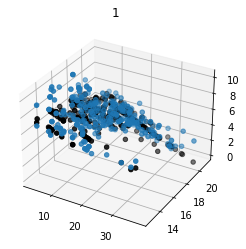

Normalized training error =  0.031392423272842494
Normalized testing error =  0.1637556072710843
degree:  2
Parameters
[[ 4.18810827]
 [-1.47815069]
 [-0.26075596]
 [ 0.33146651]
 [ 0.10543879]]


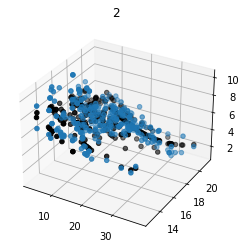

Normalized training error =  0.02552960784935928
Normalized testing error =  0.16778469874276483
degree:  3
Parameters
[[ 4.13771495]
 [-1.28408345]
 [-0.12619545]
 [ 0.55450866]
 [-0.06580299]
 [-0.10817298]
 [-0.09822153]]


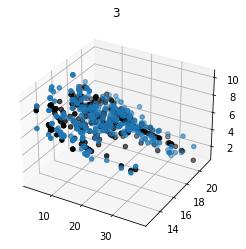

Normalized training error =  0.023935675363441822
Normalized testing error =  0.16850129651493642
4  - Fold
degree:  0
Parameters
[[4.60949999]]


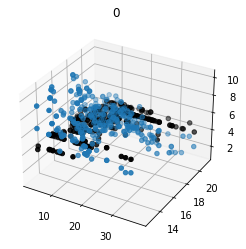

Normalized training error =  0.08995252213172565
Normalized testing error =  0.10598898712604157
degree:  1
Parameters
[[ 4.60949999]
 [-1.11690194]
 [-0.41210908]]


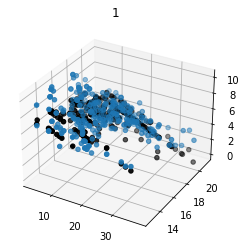

Normalized training error =  0.03349273001325069
Normalized testing error =  0.1787832400197416
degree:  2
Parameters
[[ 4.14063971]
 [-1.54802934]
 [-0.23338383]
 [ 0.3763454 ]
 [ 0.08807223]]


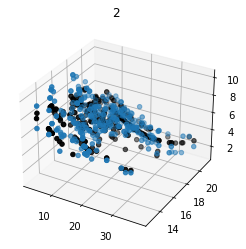

Normalized training error =  0.02506049056406975
Normalized testing error =  0.19454524142969465
degree:  3
Parameters
[[ 4.04635022]
 [-1.3645127 ]
 [-0.1619578 ]
 [ 0.60246561]
 [ 0.01035622]
 [-0.10230793]
 [-0.04917137]]


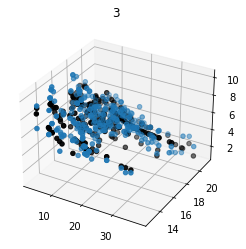

Normalized training error =  0.023780187264796544
Normalized testing error =  0.19319582768673058
5  - Fold
degree:  0
Parameters
[[4.56814948]]


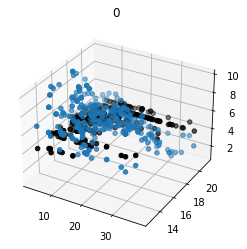

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803471723313
degree:  1
Parameters
[[ 4.56814948]
 [-1.11205459]
 [-0.3701908 ]]


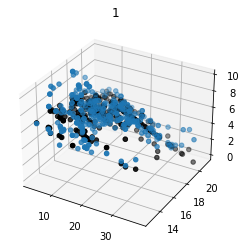

Normalized training error =  0.03635761302073386
Normalized testing error =  0.17231771005062063
degree:  2
Parameters
[[ 4.17140717]
 [-1.50103558]
 [-0.2225349 ]
 [ 0.34337598]
 [ 0.04888551]]


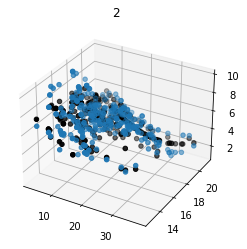

Normalized training error =  0.02898588488084465
Normalized testing error =  0.1866584748374534
degree:  3
Parameters
[[ 4.088585  ]
 [-1.35749701]
 [-0.10617943]
 [ 0.54572905]
 [-0.04794704]
 [-0.08948123]
 [-0.06723129]]


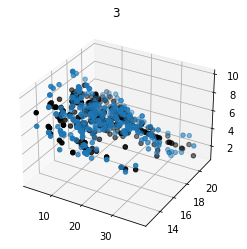

Normalized training error =  0.02785148561019168
Normalized testing error =  0.18988386212305577


In [65]:
#Feature 0-1
print("Polynomial Regression:Gradient Descent")
print(" Feature 0-1 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,1,f,df)
    Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,3)
#Feature 0-2
print(" Feature 0-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(0,2,f,df)
    Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,3)
#Feature 1-2
print(" Feature 1-2 ")
for f in range(1,6):
    print(f," - Fold")
    x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train=fold(1,2,f,df)
    Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug,x0_train,x1_train,3)
    

Best Fit

Best Fit for Feature 0-1 is found to be Linear Regression
Parameters
[ 4.54242505  0.61227464 -0.8853167 ]


<ipython-input-6-e6322e7d4790>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


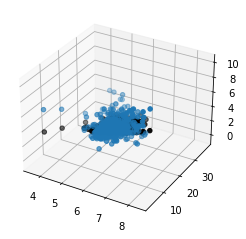

Normalized training error =  0.02816923995707772


In [6]:
print("Best Fit for Feature 0-1 is found to be Linear Regression")
X0=df[0]
X1=df[1]
Y=df[3]
x=np.vstack((X0,X1))
x_mean = x.T.mean(axis=0)
x_stdev = x.T.std(axis=0)
x_norm = (x.T - x_mean.T)/(x_stdev.T)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X = data_transform(x_norm,1)


w_mat = reg.mat_inv(Y, X)
print("Parameters")
print(w_mat)
y_pred=X.T @ w_mat
plt.title("Best fit for Feature 0-1")
ax = plt.axes(projection='3d')
ax.scatter3D(X0, X1, Y)
ax.scatter3D(X0, X1, y_pred,color='black')

plt.show()
train_error = reg.error(w_mat, Y, X)/((np.max(Y)-np.mean(Y))**2)

print('Normalized training error = ', train_error)


Best Fit for Feature 0-2 is found to be polynomial regression of degree 2
Parameters
[ 4.52258836  0.97132462 -0.68027762  0.22755922 -0.20772253]


<ipython-input-7-81145f1e4308>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


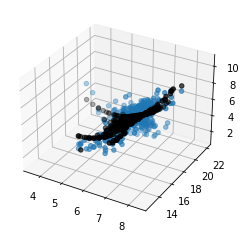

Normalized training error =  0.027405356470022093


In [7]:
print("Best Fit for Feature 0-2 is found to be polynomial regression of degree 2")
X0=df[0]
X1=df[2]
Y=df[3]
x=np.vstack((X0,X1))
x_mean = x.T.mean(axis=0)
x_stdev = x.T.std(axis=0)
x_norm = (x.T - x_mean.T)/(x_stdev.T)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X = data_transform(x_norm,2)

w_mat = reg.mat_inv(Y, X)
print("Parameters")
print(w_mat)
y_pred=X.T @ w_mat
plt.title("Best fit for Feature 0-2")
ax = plt.axes(projection='3d')
ax.scatter3D(X0, X1, Y)
ax.scatter3D(X0, X1, y_pred,color='black')
plt.show()
train_error = reg.error(w_mat, Y, X)/((np.max(Y)-np.mean(Y))**2)
print('Normalized training error = ', train_error)

Best Fit for Feature 1-2 is found to be polynomial regression of degree 3
Parameters
[ 4.16769044 -1.27674797 -0.17320358  0.4938135  -0.12720115 -0.08860426
 -0.10610284]


<ipython-input-61-c71338f78169>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


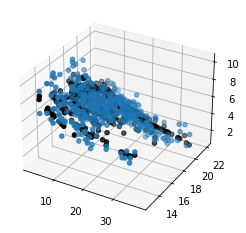

Normalized training error =  0.023557801599110903


In [61]:
print("Best Fit for Feature 1-2 is found to be polynomial regression of degree 3")
X0=df[1]
X1=df[2]
Y=df[3]
x=np.vstack((X0,X1))
x_mean = x.T.mean(axis=0)
x_stdev = x.T.std(axis=0)
x_norm = (x.T - x_mean.T)/(x_stdev.T)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X = data_transform(x_norm,3)

w_mat = reg.mat_inv(Y, X)
print("Parameters")
print(w_mat)
y_pred=X.T @ w_mat
plt.title("Best fit for Feature 1-2")
ax = plt.axes(projection='3d')
ax.scatter3D(X0, X1, Y)
ax.scatter3D(X0, X1, y_pred,color='black')
plt.show()
train_error = reg.error(w_mat, Y, X)/((np.max(Y)-np.mean(Y))**2)
print('Normalized training error = ', train_error)